In [1]:
import numpy as np
import pandas as pd

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [2]:
## Part I: Reading the whole dataset and printing it
path = "./Data.csv"
Data = pd.read_csv(path)
Data

,ID,Feature A,Feature C,Feature E,Feature G,Feature H,Feature J
0,A1YY,low,560.0,3835.0,mod-stable,A,180.0
1,A1Z0,mid,310.0,5139.0,stable,A,160.0
2,A1Z3,mid,460.0,3172.0,unstable,A,174.0
3,A1Z4,mid,390.0,467.0,stable,A,160.0
4,A1Z7,low,1170.0,1292.0,stable,A,175.0
...,...,...,...,...,...,...,...
83,AAZV,mid,130.0,1373.0,stable,S,186.0
84,AAZW,mid,NaN,5440.0,unstable,I,167.0
85,AAZY,high,20.0,203.0,unstable,A,169.0
86,AB01,mid,210.0,382.0,unstable,A,172.0


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         88 non-null     object 
 1   Feature A  88 non-null     object 
 2   Feature C  84 non-null     float64
 3   Feature E  82 non-null     float64
 4   Feature G  88 non-null     object 
 5   Feature H  88 non-null     object 
 6   Feature J  88 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.9+ KB


In [4]:
## Part II: Finding the numeric data categories
numeric_values = Data.select_dtypes(include=["float"])
print(numeric_values)
print()
print("So this means the numerical data columns are: ")
for col in numeric_values.columns.tolist():
    print(col)

    Feature C  Feature E  Feature J
0       560.0     3835.0      180.0
1       310.0     5139.0      160.0
2       460.0     3172.0      174.0
3       390.0      467.0      160.0
4      1170.0     1292.0      175.0
..        ...        ...        ...
83      130.0     1373.0      186.0
84        NaN     5440.0      167.0
85       20.0      203.0      169.0
86      210.0      382.0      172.0
87      210.0      382.0      172.0

[88 rows x 3 columns]

So this means the numerical data columns are: 
Feature C
Feature E
Feature J


In [5]:
## Part III: Printing all values of non-numeric types only
non_numeric_values = Data.select_dtypes(exclude=["float"])
print(non_numeric_values)

      ID Feature A   Feature G Feature H
0   A1YY       low  mod-stable         A
1   A1Z0       mid      stable         A
2   A1Z3       mid    unstable         A
3   A1Z4       mid      stable         A
4   A1Z7       low      stable         A
..   ...       ...         ...       ...
83  AAZV       mid      stable         S
84  AAZW       mid    unstable         I
85  AAZY      high    unstable         A
86  AB01       mid    unstable         A
87  AB01       mid      stable         A

[88 rows x 4 columns]


In [6]:
## Part IV: Mapping all non-numeric data values to numeric values
print(Data.ID.factorize())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 26, 27, 28, 29, 29, 30, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 42, 43, 44, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 77, 78,
       79, 80, 80]), Index(['A1YY', 'A1Z0', 'A1Z3', 'A1Z4', 'A1Z7', 'A1ZA', 'A1ZB', 'A1ZC', 'A1ZD',
       'A1ZE', 'A1ZF', 'A1ZG', 'A1ZH', 'A1ZJ', 'A1ZK', 'A1ZM', 'A1ZN', 'A1ZP',
       'A1ZQ', 'A1ZR', 'A1ZS', 'A1ZT', 'A1ZU', 'A1ZW', 'A1ZY', 'A2NE', 'A2NF',
       'A2NG', 'A2NH', 'A2OG', 'A2OH', 'A2OS', 'A2OV', 'A3EA', 'A3ES', 'A3ET',
       'A3EV', 'A3PL', 'A3YN', 'A42H', 'A42K', 'A42L', 'A4U8', 'A4U9', 'A5NC',
       'A690', 'A693', 'A694', 'A6FS', 'A75X', 'A8JZ', 'A8K1', 'A8K4', 'A8K5',
       'A8K6', 'A8LK', 'A8LL', 'A8LN', 'A8ZM', 'A8ZN', 'A8ZQ', 'A8ZR', 'A8ZT',
       'A8ZX', 'A8ZY', 'A9QB', 'A9SD', 'A9TA', 'A9

In [7]:
print(Data)
DataNum = Data.copy()
conversions = []

for column in non_numeric_values.columns:
    print(Data[f"{column}"])

    # Convert Feature to numeretical values
    temp_fac = Data[f"{column}"].factorize()
    DataNum[f"{column}"] = temp_fac[0]
    print(DataNum)
    
    # Print out the mapped values
    codes, uniques = temp_fac
    mapping_temp = pd.DataFrame({
        'Value': uniques,
        'Code': range(len(uniques))
    })
    print("\n\nwith the corresponding values of: \n")
    print(f"{column} mapping:")
    print(mapping_temp)
    
    feature = [f"{column}", mapping_temp, temp_fac]
    conversions.append(feature)
    print("\n\n\n\n")


      ID Feature A  Feature C  Feature E   Feature G Feature H  Feature J
0   A1YY       low      560.0     3835.0  mod-stable         A      180.0
1   A1Z0       mid      310.0     5139.0      stable         A      160.0
2   A1Z3       mid      460.0     3172.0    unstable         A      174.0
3   A1Z4       mid      390.0      467.0      stable         A      160.0
4   A1Z7       low     1170.0     1292.0      stable         A      175.0
..   ...       ...        ...        ...         ...       ...        ...
83  AAZV       mid      130.0     1373.0      stable         S      186.0
84  AAZW       mid        NaN     5440.0    unstable         I      167.0
85  AAZY      high       20.0      203.0    unstable         A      169.0
86  AB01       mid      210.0      382.0    unstable         A      172.0
87  AB01       mid      210.0      382.0      stable         A      172.0

[88 rows x 7 columns]
0     A1YY
1     A1Z0
2     A1Z3
3     A1Z4
4     A1Z7
      ... 
83    AAZV
84    AAZW
8

In [8]:
def print_conversions():
    for i in conversions:
        print(i[0])
        print()
        print(i[1])
        print()
        print("=======================================")
        print()

print_conversions()

ID

   Value  Code
0   A1YY     0
1   A1Z0     1
2   A1Z3     2
3   A1Z4     3
4   A1Z7     4
..   ...   ...
76  AAA4    76
77  AAZV    77
78  AAZW    78
79  AAZY    79
80  AB01    80

[81 rows x 2 columns]


Feature A

  Value  Code
0   low     0
1   mid     1
2  high     2


Feature G

        Value  Code
0  mod-stable     0
1      stable     1
2    unstable     2


Feature H

  Value  Code
0     A     0
1     S     1
2    A      2
3     I     3




In [9]:
print(DataNum)

    ID  Feature A  Feature C  Feature E  Feature G  Feature H  Feature J
0    0          0      560.0     3835.0          0          0      180.0
1    1          1      310.0     5139.0          1          0      160.0
2    2          1      460.0     3172.0          2          0      174.0
3    3          1      390.0      467.0          1          0      160.0
4    4          0     1170.0     1292.0          1          0      175.0
..  ..        ...        ...        ...        ...        ...        ...
83  77          1      130.0     1373.0          1          1      186.0
84  78          1        NaN     5440.0          2          3      167.0
85  79          2       20.0      203.0          2          0      169.0
86  80          1      210.0      382.0          2          0      172.0
87  80          1      210.0      382.0          1          0      172.0

[88 rows x 7 columns]


In [10]:
## Part VIII: Remove duplicate rows based on duplicated ID
    # It makes more sense to remove those values here before going any further
print("Before removing duplicates:")
print(DataNum)
DataNum = DataNum.drop_duplicates(subset="ID")
print("After removing duplicates:")
print(DataNum)

Before removing duplicates:
    ID  Feature A  Feature C  Feature E  Feature G  Feature H  Feature J
0    0          0      560.0     3835.0          0          0      180.0
1    1          1      310.0     5139.0          1          0      160.0
2    2          1      460.0     3172.0          2          0      174.0
3    3          1      390.0      467.0          1          0      160.0
4    4          0     1170.0     1292.0          1          0      175.0
..  ..        ...        ...        ...        ...        ...        ...
83  77          1      130.0     1373.0          1          1      186.0
84  78          1        NaN     5440.0          2          3      167.0
85  79          2       20.0      203.0          2          0      169.0
86  80          1      210.0      382.0          2          0      172.0
87  80          1      210.0      382.0          1          0      172.0

[88 rows x 7 columns]
After removing duplicates:
    ID  Feature A  Feature C  Feature E  Featu

    Feature G  Feature H
0           0          0
1           1          0
2           2          0
3           1          0
4           1          0
..        ...        ...
81          2          0
82          1          1
84          2          3
85          2          0
86          2          0

[81 rows x 2 columns]



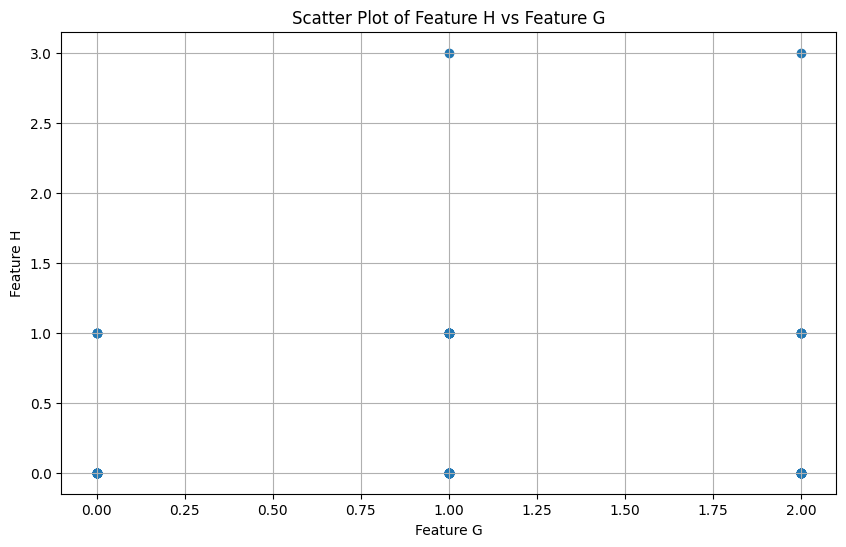

In [11]:
## Part V: Create a plot for Feature G vs Feature H
import matplotlib.pyplot as plt
plottingData = DataNum[["Feature G", "Feature H"]].copy()
print(plottingData)
print()

#"""
# Making the plot
plt.figure(figsize=(10, 6))
plt.scatter(plottingData["Feature G"], plottingData["Feature H"])
plt.title("Scatter Plot of Feature H vs Feature G")
plt.xlabel("Feature G")
plt.ylabel("Feature H")
plt.grid(True)
plt.show()

# this can also be done directly from the original DataNum table:
# plt.figure(figsize=(10, 6))
# plt.scatter(DataNum["Feature G"], DataNum["Feature H"])
# plt.title("Scatter Plot of Feature H vs Feature G lol")
# plt.xlabel("Feature G")
# plt.ylabel("Feature H")
# plt.grid(True)
# plt.show()

In [12]:
## Parts VI and VII: Analyze the chart to find outliers and replace them with median values
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1      # IQR is interquartile range
    if(IQR == 0):
        IQR = (Q1/2)
    lower_bound = Q1 - (2.5 * IQR)
    upper_bound = Q3 + (2.5 * IQR)
    print(f"Q1: {Q1} , Q3: {Q3} , IQR: {IQR}")
    return((data < lower_bound) | (data > upper_bound) )


DataOut = DataNum.copy()

for column in DataOut.columns:
    outliers = detect_outliers_iqr(DataOut[f"{column}"])
    print(outliers)
    median_value = DataOut[f"{column}"].median()
    DataOut.loc[outliers, f"{column}"] = median_value
    print("\n")
print(DataNum)
print("\n\n\n\n\n")
print(DataOut)

Q1: 20.0 , Q3: 60.0 , IQR: 40.0
0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
84    False
85    False
86    False
Name: ID, Length: 81, dtype: bool


Q1: 1.0 , Q3: 1.0 , IQR: 0.5
0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
84    False
85    False
86    False
Name: Feature A, Length: 81, dtype: bool


Q1: 150.0 , Q3: 420.0 , IQR: 270.0
0     False
1     False
2     False
3     False
4      True
      ...  
81    False
82    False
84    False
85    False
86    False
Name: Feature C, Length: 81, dtype: bool


Q1: 163.5 , Q3: 2470.0 , IQR: 2306.5
0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
84    False
85    False
86    False
Name: Feature E, Length: 81, dtype: bool


Q1: 1.0 , Q3: 2.0 , IQR: 1.0
0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
84    False
85    False
86    False
Name: Feature

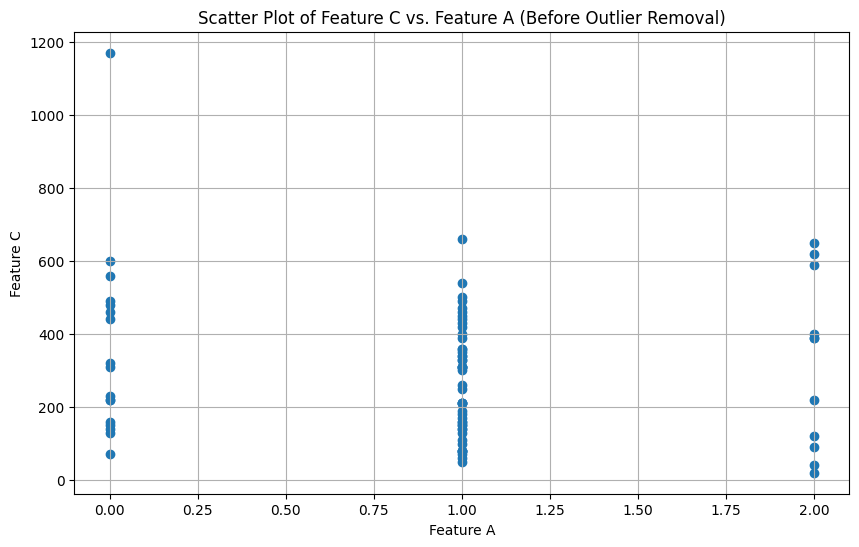

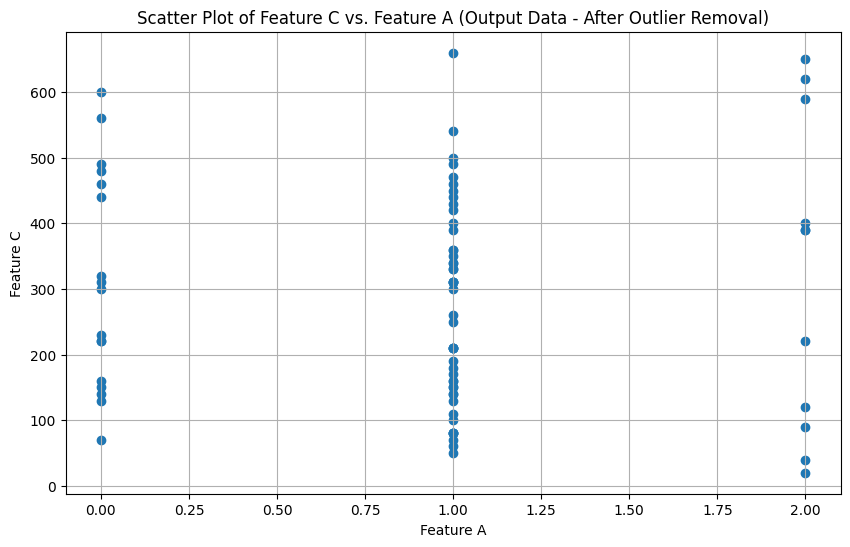

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(DataNum["Feature A"], DataNum["Feature C"])
plt.title("Scatter Plot of Feature C vs. Feature A (Before Outlier Removal)")
plt.xlabel("Feature A")
plt.ylabel("Feature C")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(DataOut["Feature A"], DataOut["Feature C"])
plt.title("Scatter Plot of Feature C vs. Feature A (Output Data - After Outlier Removal)")
plt.xlabel("Feature A")
plt.ylabel("Feature C")
plt.grid(True)
plt.show()
